In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings

In [94]:
# Imports for JupyterLite
#%pip install -q ipywidgets
#%pip install openpyxl

<font color="#00FFFF" size="5">**INPUT**</font>

In [95]:
# Input the data
file_name = 'GKP1_GT11_Vibration_Tur.xlsx'
start_date_normal = '2022-01-01'
end_date_normal = '2023-06-30'
path_file_name_export = r'D:\1 ML session for project team\Data wrangling\GKP1\GKP1_GT11_Vibration_Tur_Cleansing.xlsx'

In [96]:
'''
# Define functions to update global variables
def file_name(name):
  global file_name
  file_name = name

def update_start_date_normal(date):
    global start_date_normal
    start_date_normal = date

def update_end_date_normal(date):
    global end_date_normal
    end_date_normal = date

def update_start_date_current(date):
    global start_date_current
    start_date_current = date

def update_end_date_current(date):
    global end_date_current
    end_date_current = date
'''

'\n# Define functions to update global variables\ndef file_name(name):\n  global file_name\n  file_name = name\n\ndef update_start_date_normal(date):\n    global start_date_normal\n    start_date_normal = date\n\ndef update_end_date_normal(date):\n    global end_date_normal\n    end_date_normal = date\n\ndef update_start_date_current(date):\n    global start_date_current\n    start_date_current = date\n\ndef update_end_date_current(date):\n    global end_date_current\n    end_date_current = date\n'

In [97]:
'''
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

file_desc = widgets.Label('file name:')
file_widget = widgets.Text(value='')
file_box = widgets.HBox([file_desc, file_widget])
widgets.interactive(file_name, name=file_widget)
display(file_box)
'''

"\nfrom ipywidgets import interact, interactive, fixed, interact_manual\nimport ipywidgets as widgets\n\nfile_desc = widgets.Label('file name:')\nfile_widget = widgets.Text(value='')\nfile_box = widgets.HBox([file_desc, file_widget])\nwidgets.interactive(file_name, name=file_widget)\ndisplay(file_box)\n"

In [98]:
'''
# Create text input widgets with descriptions
sdn_desc = widgets.Label('start date normal:')
sdn_widget = widgets.Text(value='')
edn_desc = widgets.Label('end date normal:')
edn_widget = widgets.Text(value='')

# Create HBox containers for each widget and description
sdn_box = widgets.HBox([sdn_desc, sdn_widget])
edn_box = widgets.HBox([edn_desc, edn_widget])

# Define global variables to store date values
start_date_normal = None
end_date_normal = None

# Use the interactive function to display the text input widgets and update the variables
sdn_output = widgets.interactive(update_start_date_normal, date=sdn_widget)
edn_output = widgets.interactive(update_end_date_normal, date=edn_widget)

# Display the interactive widgets within their respective containers
display(sdn_box)
display(edn_box)
'''

"\n# Create text input widgets with descriptions\nsdn_desc = widgets.Label('start date normal:')\nsdn_widget = widgets.Text(value='')\nedn_desc = widgets.Label('end date normal:')\nedn_widget = widgets.Text(value='')\n\n# Create HBox containers for each widget and description\nsdn_box = widgets.HBox([sdn_desc, sdn_widget])\nedn_box = widgets.HBox([edn_desc, edn_widget])\n\n# Define global variables to store date values\nstart_date_normal = None\nend_date_normal = None\n\n# Use the interactive function to display the text input widgets and update the variables\nsdn_output = widgets.interactive(update_start_date_normal, date=sdn_widget)\nedn_output = widgets.interactive(update_end_date_normal, date=edn_widget)\n\n# Display the interactive widgets within their respective containers\ndisplay(sdn_box)\ndisplay(edn_box)\n"

#### **Dataframe**

In [99]:
# Create dataframe
df = pd.read_excel(file_name, parse_dates=['DateTime'])

In [100]:
df.head()

,DateTime,POWER GENERATOR,RADIAL BEARING 1 TEMP-1,RADIAL BEARING 1 TEMP-2,THRUST BEARING 1 TEMP-1,THRUST BEARING 1 TEMP-2,AXIAL DISPLACEMENT-1,AXIAL DISPLACEMENT-2,VIBRATION BEARING 1 (Compressor side),RADIAL BEARING 2 TEMP-1,RADIAL BEARING 2 TEMP-2,VIBRATION BEARING 2 (Turbine side),TEMP LUBE OIL SUPPLY 1,TEMP LUBE OIL SUPPLY 2,TEMP LUBE OIL RETURN (LUBE OIL TANK TEMP)
0,NaT,MW,degC,degC,degC,degC,mm,mm,mm/s,degC,degC,mm/s,degC,degC,degC
1,NaT,11MKA10CE010_XE01,11MBA10CT005_OUT,11MBA10CT010_OUT,11MBA10CT015_OUT,11MBA10CT020_OUT,11MBA10CG005_OUT,11MBA10CG010_OUT,11MBA10CY005_OUT,11MBA10CT090_OUT,11MBA10CT095_OUT,11MBA10CY010_OUT,11MBV40CT005_OUT,11MBV40CT015_OUT,11MBV10CT020_OUT
2,2021-01-01 00:00:00,0,33.900002,34.099998,34.5,34.187801,0.47,0.49,0.1,39.200001,39.400002,0,23.5,23.799999,47
3,2021-01-01 00:05:00,0,34,34,34.400002,34,0.47,0.49,0.1,39.200001,39.400002,0,23.5,23.700001,47
4,2021-01-01 00:10:00,0,33.799999,33.799999,34.299999,33.900002,0.47,0.49,0.1,39.099998,39.299999,0,23.5,23.6,47


In [101]:
n_start = pd.to_datetime(start_date_normal)
n_end = pd.to_datetime(end_date_normal)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262370 entries, 0 to 262369
Data columns (total 15 columns):
 #   Column                                     Non-Null Count   Dtype         
---  ------                                     --------------   -----         
 0   DateTime                                   262368 non-null  datetime64[ns]
 1   POWER GENERATOR                            262370 non-null  object        
 2   RADIAL BEARING 1 TEMP-1                    262370 non-null  object        
 3   RADIAL BEARING 1 TEMP-2                    262370 non-null  object        
 4   THRUST BEARING 1 TEMP-1                    262370 non-null  object        
 5   THRUST BEARING 1 TEMP-2                    262370 non-null  object        
 6   AXIAL DISPLACEMENT-1                       262370 non-null  object        
 7   AXIAL DISPLACEMENT-2                       262370 non-null  object        
 8   VIBRATION BEARING 1 (Compressor side)      262370 non-null  object        
 9   RADI

In [103]:
# List sensors name excluding prediction variable (POWER GENERATOR)
list_sensor =list(df.columns[2:]) 
list_sensor

['RADIAL BEARING 1 TEMP-1',
 'RADIAL BEARING 1 TEMP-2',
 'THRUST BEARING 1 TEMP-1',
 'THRUST BEARING 1 TEMP-2',
 'AXIAL DISPLACEMENT-1',
 'AXIAL DISPLACEMENT-2',
 'VIBRATION BEARING 1 (Compressor side)',
 'RADIAL BEARING 2 TEMP-1',
 'RADIAL BEARING 2 TEMP-2',
 'VIBRATION BEARING 2 (Turbine side)',
 'TEMP LUBE OIL SUPPLY 1',
 'TEMP LUBE OIL SUPPLY 2',
 'TEMP LUBE OIL RETURN (LUBE OIL TANK TEMP)']

In [104]:
# List colume name exclude dateTime columns
list_col = list(df.columns[1:])
list_col

['POWER GENERATOR',
 'RADIAL BEARING 1 TEMP-1',
 'RADIAL BEARING 1 TEMP-2',
 'THRUST BEARING 1 TEMP-1',
 'THRUST BEARING 1 TEMP-2',
 'AXIAL DISPLACEMENT-1',
 'AXIAL DISPLACEMENT-2',
 'VIBRATION BEARING 1 (Compressor side)',
 'RADIAL BEARING 2 TEMP-1',
 'RADIAL BEARING 2 TEMP-2',
 'VIBRATION BEARING 2 (Turbine side)',
 'TEMP LUBE OIL SUPPLY 1',
 'TEMP LUBE OIL SUPPLY 2',
 'TEMP LUBE OIL RETURN (LUBE OIL TANK TEMP)']

In [105]:
# Define function to remove text row
def remove_Text_rows(df):
    # Loop through each columns in DataFrame
    for col in df.columns:
        # Check if the column contains text values
        if df[col].isnull().sum() > 0:
            df = df[~df[col].fillna('').astype(str).str.contains('[a-zA-Z]')]
        else:
            df = df[~df[col].astype(str).str.contains('[a-zA-Z]')]

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

In [106]:
import numpy as np
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.dropna(axis=0, how='any')

In [107]:
remove_Text_rows(df)

In [108]:
#Transform Datetime column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'])
#format = "%Y-%m-%d %H:%M:%S"

In [109]:
#loop change datatype to numeric
for col in df.columns:
  if col != 'DateTime':
    df[col] = pd.to_numeric(df[col],errors='coerce')
#check data types
df.dtypes

DateTime                                     datetime64[ns]
POWER GENERATOR                                     float64
RADIAL BEARING 1 TEMP-1                             float64
RADIAL BEARING 1 TEMP-2                             float64
THRUST BEARING 1 TEMP-1                             float64
THRUST BEARING 1 TEMP-2                             float64
AXIAL DISPLACEMENT-1                                float64
AXIAL DISPLACEMENT-2                                float64
VIBRATION BEARING 1 (Compressor side)               float64
RADIAL BEARING 2 TEMP-1                             float64
RADIAL BEARING 2 TEMP-2                             float64
VIBRATION BEARING 2 (Turbine side)                  float64
TEMP LUBE OIL SUPPLY 1                              float64
TEMP LUBE OIL SUPPLY 2                              float64
TEMP LUBE OIL RETURN (LUBE OIL TANK TEMP)           float64
dtype: object

In [110]:
n_start = pd.to_datetime(start_date_normal)
n_end = pd.to_datetime(end_date_normal)
df_old = df[(df['DateTime'] >=n_start) & (df['DateTime'] < n_end)]
df_old.reset_index(drop=True, inplace=True)
df_old.head()

,DateTime,POWER GENERATOR,RADIAL BEARING 1 TEMP-1,RADIAL BEARING 1 TEMP-2,THRUST BEARING 1 TEMP-1,THRUST BEARING 1 TEMP-2,AXIAL DISPLACEMENT-1,AXIAL DISPLACEMENT-2,VIBRATION BEARING 1 (Compressor side),RADIAL BEARING 2 TEMP-1,RADIAL BEARING 2 TEMP-2,VIBRATION BEARING 2 (Turbine side),TEMP LUBE OIL SUPPLY 1,TEMP LUBE OIL SUPPLY 2,TEMP LUBE OIL RETURN (LUBE OIL TANK TEMP)
0,2022-01-01 00:00:00,0.0,35.400002,35.400002,35.700001,35.099998,0.47,0.49,0.1,40.400002,40.099998,0.0,26.9,27.200001,48.0
1,2022-01-01 00:05:00,0.0,35.200001,35.299999,35.500000,35.000000,0.47,0.49,0.1,40.099998,40.099998,0.0,26.9,27.200001,48.0
2,2022-01-01 00:10:00,0.0,35.099998,35.212841,35.400002,35.099998,0.47,0.49,0.1,40.099998,40.200001,0.0,26.9,27.200001,48.0
3,2022-01-01 00:15:00,0.0,35.000000,35.099998,35.500000,34.900002,0.47,0.49,0.1,40.200001,40.000000,0.0,26.9,27.200001,48.0
4,2022-01-01 00:20:00,0.0,34.900002,35.099998,35.200001,34.900002,0.47,0.49,0.1,40.000000,40.000000,0.0,27.0,27.048658,49.0


In [111]:
df_old.describe()

,POWER GENERATOR,RADIAL BEARING 1 TEMP-1,RADIAL BEARING 1 TEMP-2,THRUST BEARING 1 TEMP-1,THRUST BEARING 1 TEMP-2,AXIAL DISPLACEMENT-1,AXIAL DISPLACEMENT-2,VIBRATION BEARING 1 (Compressor side),RADIAL BEARING 2 TEMP-1,RADIAL BEARING 2 TEMP-2,VIBRATION BEARING 2 (Turbine side),TEMP LUBE OIL SUPPLY 1,TEMP LUBE OIL SUPPLY 2,TEMP LUBE OIL RETURN (LUBE OIL TANK TEMP)
count,156274.000000,156274.000000,156274.000000,156274.000000,156274.000000,156274.000000,156274.000000,156274.000000,156274.000000,156274.000000,156274.000000,156274.000000,156274.000000,156272.000000
mean,28.249425,67.398062,63.674157,64.107853,63.924734,0.194315,0.207450,2.870428,74.988754,71.834266,1.810417,45.683420,46.084969,64.748260
std,15.400173,16.008520,15.971822,15.621937,15.557124,0.233710,0.239586,2.047182,23.261470,23.777682,1.126346,5.044952,5.107738,8.378068
min,-1.645760,25.600000,0.177519,25.700001,25.600000,-0.500000,-0.460000,0.000000,28.400000,28.400000,0.000000,24.400000,24.500000,44.238674
25%,27.752949,71.833339,55.625896,64.800003,64.900002,0.000000,0.010000,1.800000,72.000000,68.099998,1.300000,47.299999,47.799999,68.000000
50%,35.725714,72.800003,67.943699,68.034150,68.500000,0.070000,0.070000,2.400000,72.343351,68.599998,1.900000,47.400002,47.900002,69.000000
75%,38.923540,73.199997,72.800003,72.000000,71.432692,0.468652,0.488642,5.200000,72.639993,69.000000,2.500000,47.599998,48.000000,70.000000
max,44.035789,150.000000,150.000000,150.000000,150.000000,0.686952,0.570000,24.700001,150.000000,150.000000,6.868830,53.700001,53.900002,70.000000


##### **Filter Outliers of data**

In [112]:
#%pip install seaborn
#%pip install plotly
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#import plotly.graph_objects as go # creates plots

In [113]:
# Input the power generator condition
df_plt = df_old[df_old['POWER GENERATOR']>=15].reset_index(drop=True)

In [114]:
'''
#Define power generator interval
normal_low_int =(df_old['POWER GENERATOR'] > 20) & (df_old['POWER GENERATOR'] <= 25)
normal_lowmed_int =(df_old['POWER GENERATOR'] > 25) & (df_old['POWER GENERATOR'] <= 30 )
normal_med_int =(df_old['POWER GENERATOR'] > 30) & (df_old['POWER GENERATOR'] <= 35 )
normal_highmed_int =(df_old['POWER GENERATOR'] > 35) & (df_old['POWER GENERATOR'] <= 40 )
normal_high_int =(df_old['POWER GENERATOR'] > 40) & (df_old['POWER GENERATOR'] <= float(45) )
normal_highhigh_int =df_old['POWER GENERATOR'] > float(45)

#Define df by each load types
df_nlow = df_old[normal_low_int]
df_nlowmed = df_old[normal_lowmed_int]
df_nmed = df_old[normal_med_int]
df_nhighmed = df_old[normal_highmed_int]
df_nhigh = df_old[normal_high_int]
df_nhigh = df_old[normal_highhigh_int]

#Define interval types
intervals = ['LOWLOW','LOW','LOWMED','MED','HIGHMED','HIGH','HIGHHIGH']
'''
'''
# Create a new column based on the intervals
df_old.loc[normal_low_int, 'load_type'] = '2'
df_old.loc[normal_lowmed_int, 'load_type'] = '3'
df_old.loc[normal_med_int, 'load_type'] = '4'
df_old.loc[normal_highmed_int, 'load_type'] = '5'
df_old.loc[normal_high_int, 'load_type'] = '6'
df_old.loc[normal_highhigh_int, 'load_type'] = '7'

df_old['load_type'] = pd.to_numeric(df_old['load_type'],errors='coerce')
'''

"\n# Create a new column based on the intervals\ndf_old.loc[normal_low_int, 'load_type'] = '2'\ndf_old.loc[normal_lowmed_int, 'load_type'] = '3'\ndf_old.loc[normal_med_int, 'load_type'] = '4'\ndf_old.loc[normal_highmed_int, 'load_type'] = '5'\ndf_old.loc[normal_high_int, 'load_type'] = '6'\ndf_old.loc[normal_highhigh_int, 'load_type'] = '7'\n\ndf_old['load_type'] = pd.to_numeric(df_old['load_type'],errors='coerce')\n"

In [115]:
nan_rows = df_old[df_old.isna().any(axis=1)]
nan_rows.head()

,DateTime,POWER GENERATOR,RADIAL BEARING 1 TEMP-1,RADIAL BEARING 1 TEMP-2,THRUST BEARING 1 TEMP-1,THRUST BEARING 1 TEMP-2,AXIAL DISPLACEMENT-1,AXIAL DISPLACEMENT-2,VIBRATION BEARING 1 (Compressor side),RADIAL BEARING 2 TEMP-1,RADIAL BEARING 2 TEMP-2,VIBRATION BEARING 2 (Turbine side),TEMP LUBE OIL SUPPLY 1,TEMP LUBE OIL SUPPLY 2,TEMP LUBE OIL RETURN (LUBE OIL TANK TEMP)
17473,2022-03-02 16:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18853,2022-03-07 11:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20029,2022-03-11 13:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20030,2022-03-11 13:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20031,2022-03-11 13:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
#drop na if require
df_plt.dropna(inplace=True)
df_plt.reset_index(drop=True, inplace=True)

Shape before filter: (122005, 15)
Shape after filter: (106571, 15)


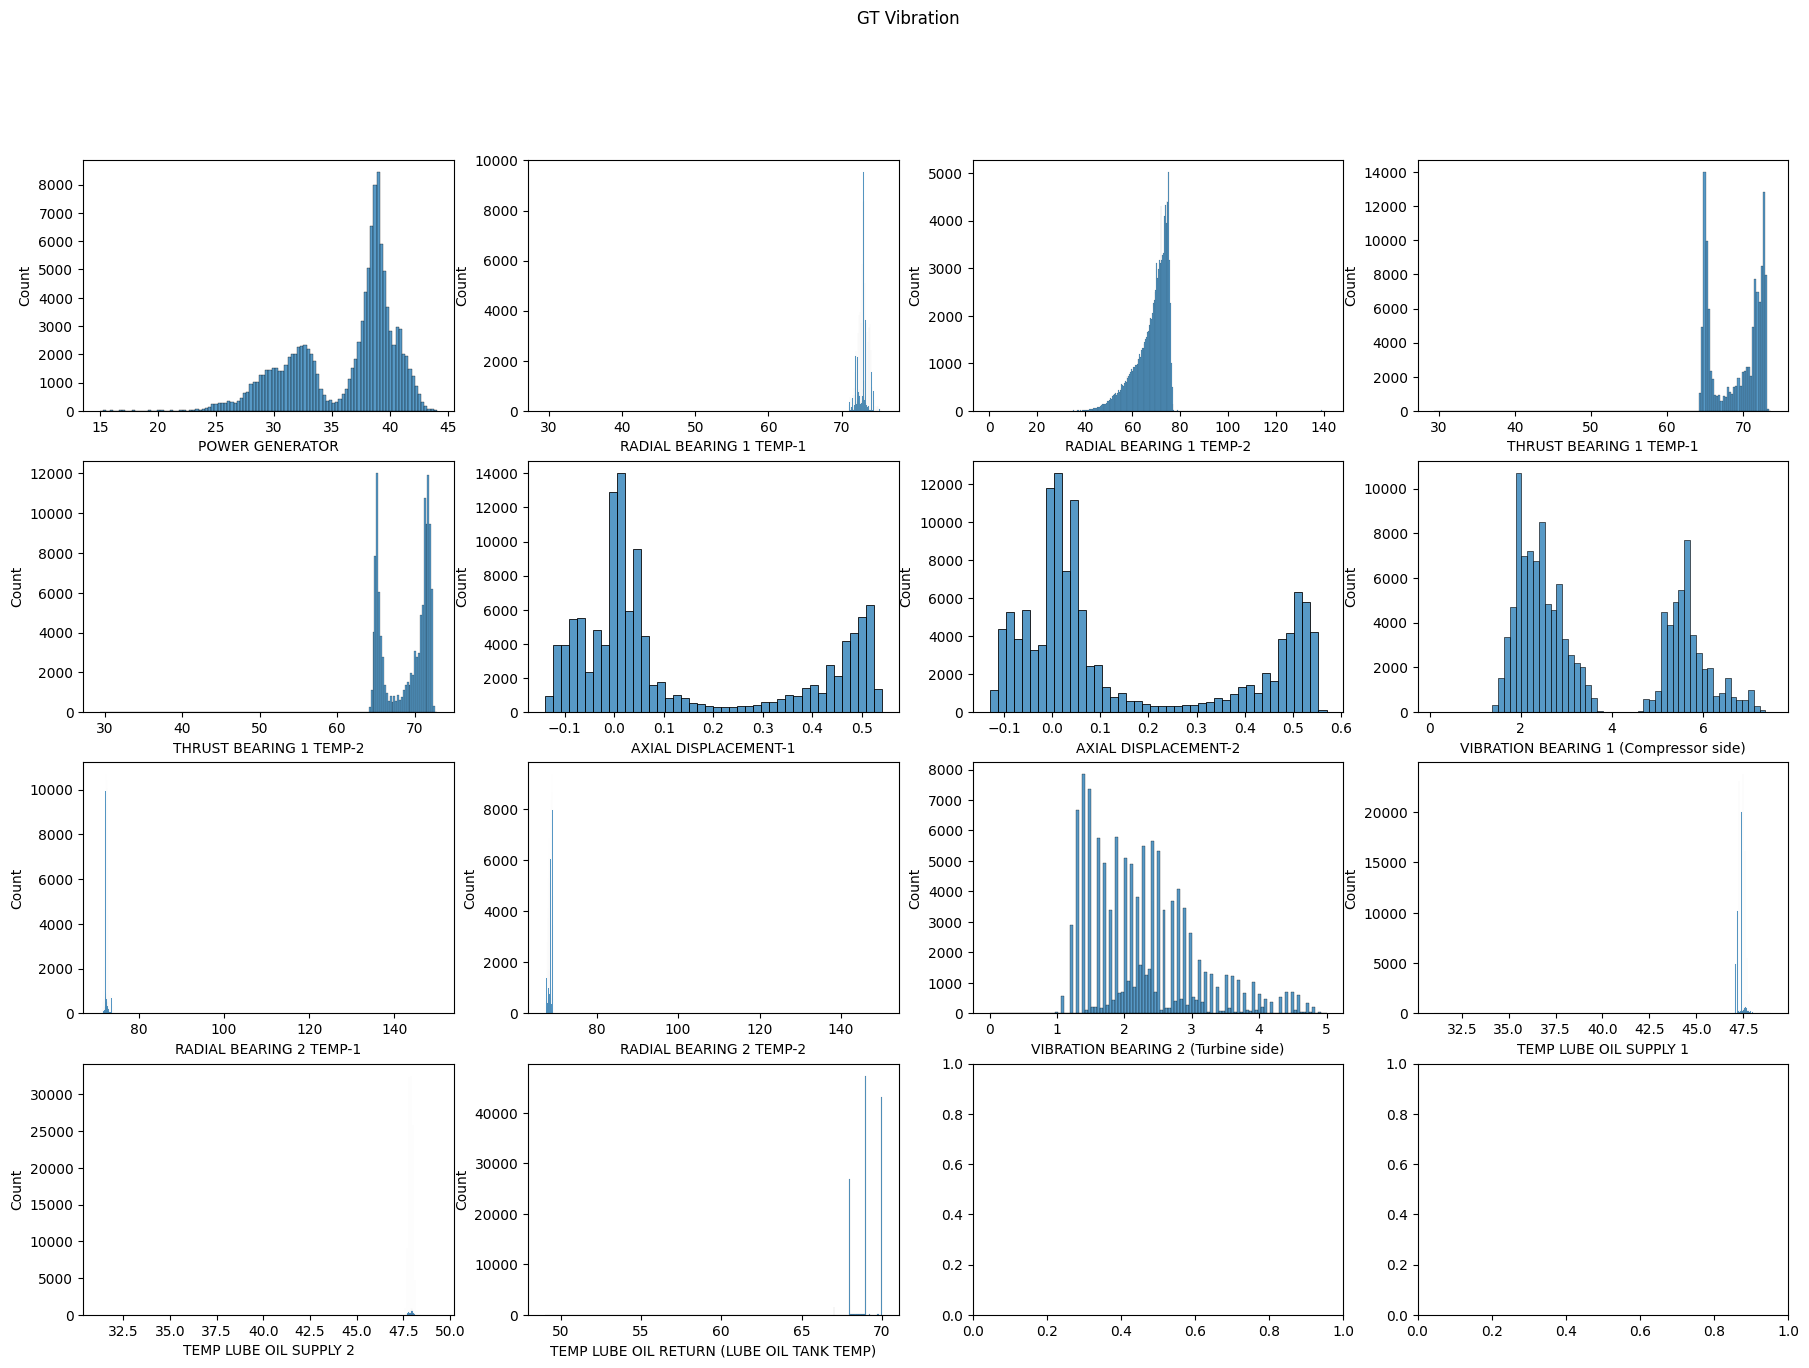

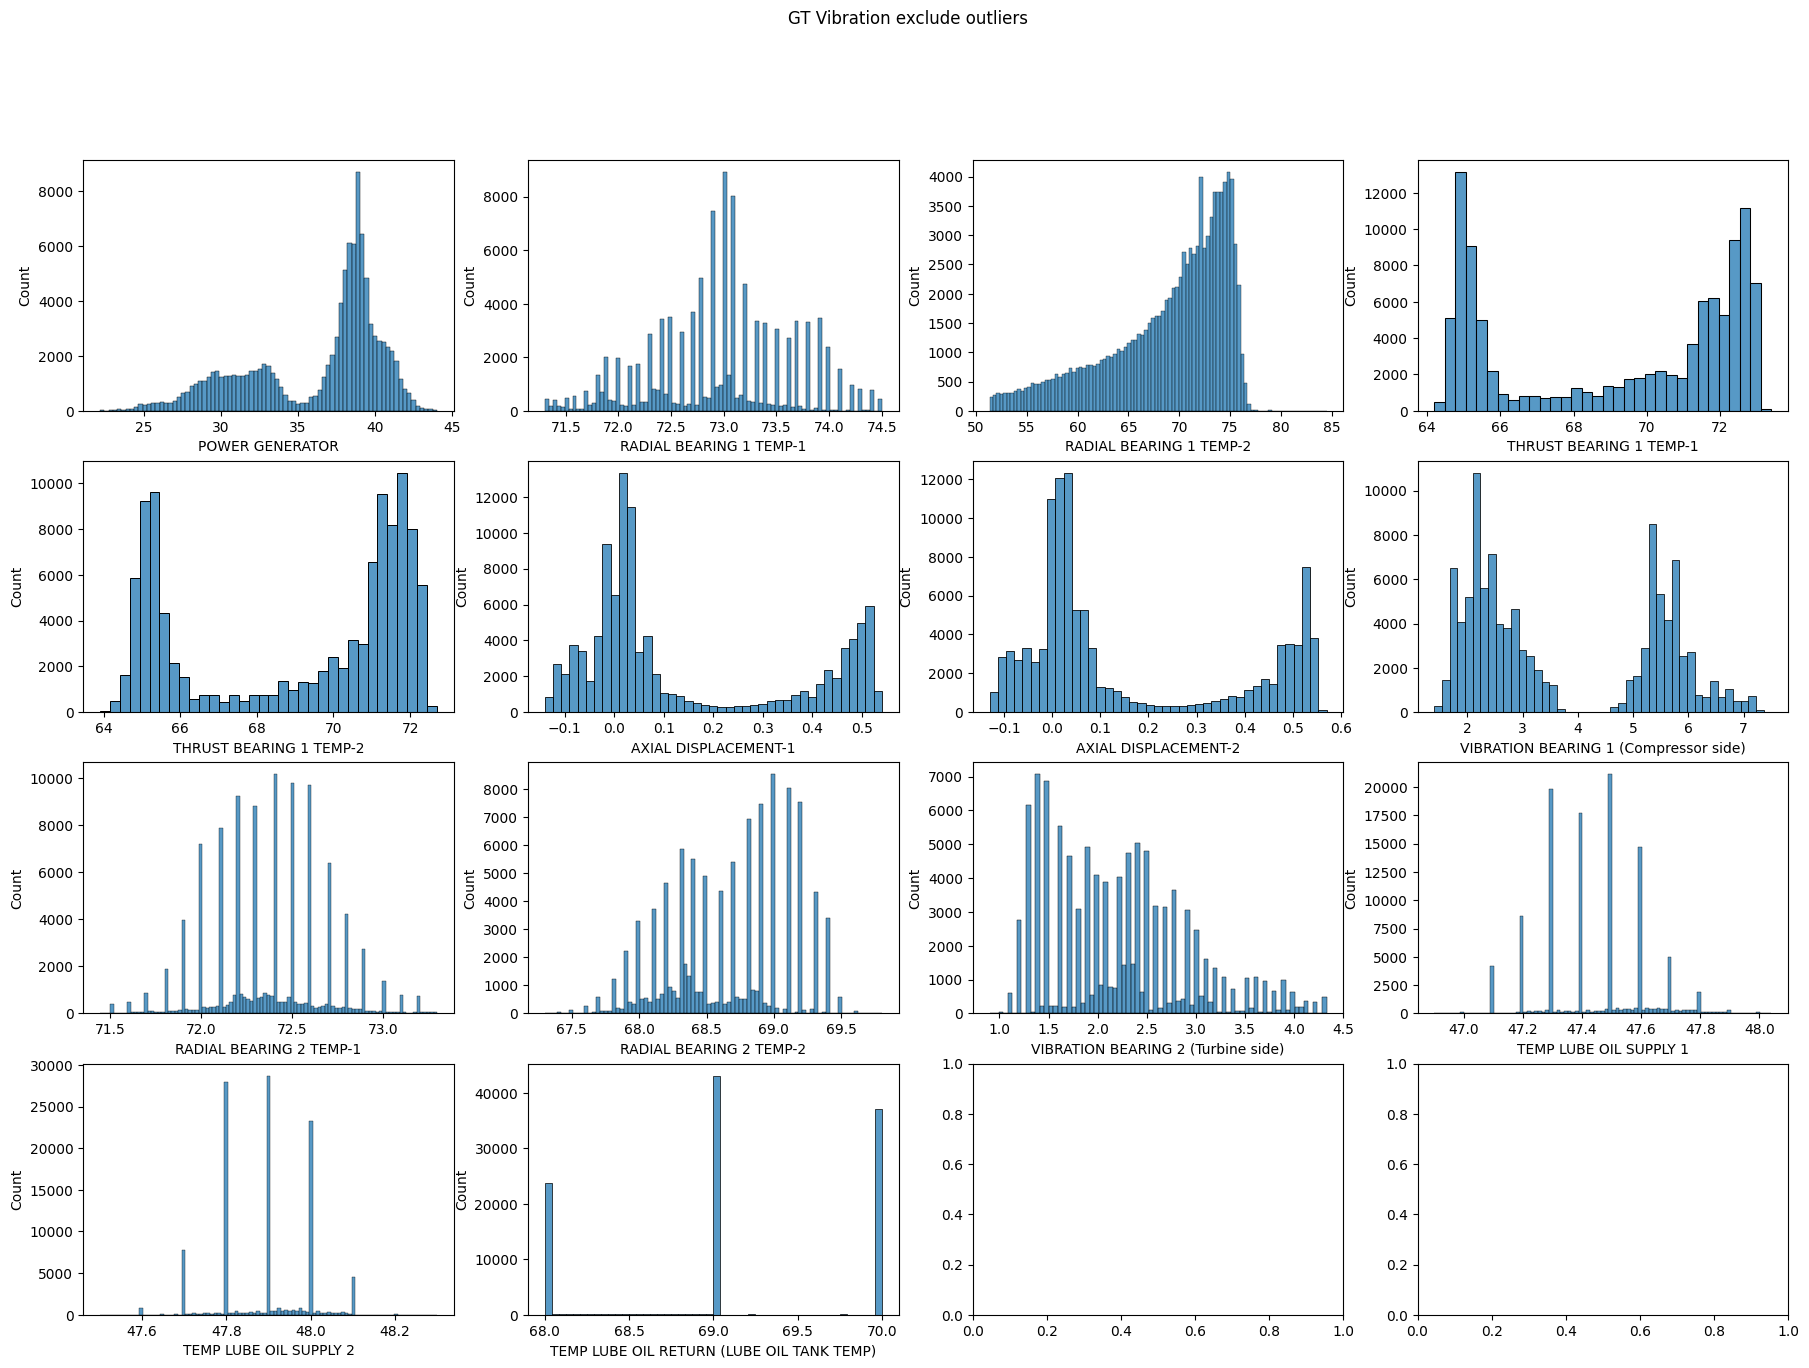

In [117]:
# This section is to remove the outliers of data

df_load_type = df_plt

print('Shape before filter:', df_load_type.shape)
# Plot subplot
l = len(list_col)
fig, axes = plt.subplots(4, int(round(l/4,0)), figsize=(22, 15))
fig.suptitle('GT Vibration')
j = 0
k = 0
r = 1
for i, col in enumerate(list_col):
    sns.histplot(ax=axes[j, k], data=df_load_type, x=col)
    k += 1
    if r%4 == 0:
        j += 1
        k = 0
    r += 1

# Get the columns that match the specified load type and exclude the outliers
cols = list_col
Q1 = df_load_type[list_col].quantile(0.25)
Q3 = df_load_type[list_col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
for col in cols:
    ind = (df_load_type[col]>=lower[col]) & (df_load_type[col]<=upper[col])
    df_load_type=df_load_type[ind].reset_index(drop=True)

print('Shape after filter:', df_load_type.shape)
# Plot subplot after excluding outliers
l = len(list_col)
fig, axes = plt.subplots(4, int(round(l/4,0)), figsize=(22, 15))
fig.suptitle('GT Vibration exclude outliers')
j = 0
k = 0
r = 1
for i, col in enumerate(list_col):
    sns.histplot(ax=axes[j, k], data=df_load_type, x=col)
    k += 1
    if r%4 == 0:
        j += 1
        k = 0
    r += 1

In [118]:
#Input file name to expot
df_plt.to_excel(path_file_name_export, index=False)

In [119]:
'''
load_types = sorted(df_old['load_type'].unique())

load_type = 2
df_load_type = df_old[df_old['load_type'] == load_type].reset_index(drop=True)

print('Shape before filter:', df_load_type.shape)
# Plot subplot
l = len(list_col)
fig, axes = plt.subplots(4, int(round(l/4,0)), figsize=(20, 15))
fig.suptitle('GT Vibration')
j = 0
k = 0
r = 1
for i, col in enumerate(list_col):
    sns.histplot(ax=axes[j, k], data=df_load_type, x=col)
    k += 1
    if r%4 == 0:
        j += 1
        k = 0
    r += 1

# Get the columns that match the specified load type and exclude the outliers
cols = list_col
Q1 = df_load_type[list_col].quantile(0.25)
Q3 = df_load_type[list_col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
for col in cols:
    ind = (df_load_type[col]>=lower[col]) & (df_load_type[col]<=upper[col])
    df_load_type=df_load_type[ind].reset_index(drop=True)

print('Shape after filter:', df_load_type.shape)
# Plot subplot after excluding outliers
l = len(list_col)
fig, axes = plt.subplots(4, int(round(l/4,0)), figsize=(20, 15))
fig.suptitle('GT Vibration')
j = 0
k = 0
r = 1
for i, col in enumerate(list_col):
    sns.histplot(ax=axes[j, k], data=df_load_type, x=col)
    k += 1
    if r%4 == 0:
        j += 1
        k = 0
    r += 1
'''

"\nload_types = sorted(df_old['load_type'].unique())\n\nload_type = 2\ndf_load_type = df_old[df_old['load_type'] == load_type].reset_index(drop=True)\n\nprint('Shape before filter:', df_load_type.shape)\n# Plot subplot\nl = len(list_col)\nfig, axes = plt.subplots(4, int(round(l/4,0)), figsize=(20, 15))\nfig.suptitle('GT Vibration')\nj = 0\nk = 0\nr = 1\nfor i, col in enumerate(list_col):\n    sns.histplot(ax=axes[j, k], data=df_load_type, x=col)\n    k += 1\n    if r%4 == 0:\n        j += 1\n        k = 0\n    r += 1\n\n# Get the columns that match the specified load type and exclude the outliers\ncols = list_col\nQ1 = df_load_type[list_col].quantile(0.25)\nQ3 = df_load_type[list_col].quantile(0.75)\nIQR = Q3 - Q1\nlower = Q1 - 1.5*IQR\nupper = Q3 + 1.5*IQR\nfor col in cols:\n    ind = (df_load_type[col]>=lower[col]) & (df_load_type[col]<=upper[col])\n    df_load_type=df_load_type[ind].reset_index(drop=True)\n\nprint('Shape after filter:', df_load_type.shape)\n# Plot subplot after excl